In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt

In [2]:
X_train = np.loadtxt(open("logistic_news/X_train.csv", "rb"), delimiter=",")
y_train = np.loadtxt(open("logistic_news/y_train.csv", "rb"), delimiter=",")
X_test = np.loadtxt(open("logistic_news/X_test.csv", "rb"), delimiter=",")
y_test = np.loadtxt(open("logistic_news/y_test.csv", "rb"), delimiter=",")
C = 20

In [3]:
def objective(X, y, beta, mu, C):
    N = X.shape[0]
    sizeX = X.shape[1]
    #obj3 = mu*la.norm(beta)
    
    obj = 0
    tempVec = np.zeros(C)
    for i in range(X.shape[0]):
        x = X[i,:]
        obj1 = np.dot(beta[int(y[i]*X.shape[1]):int((y[i]*X.shape[1]+X.shape[1]))],x)
        for j in range(C):
            tempVec[j] = np.exp(-np.dot(beta[j*sizeX:(j*sizeX+sizeX)], x))
        obj2 = np.log(np.sum(tempVec))
        
        obj += obj1 + obj2
    
    obj = 1/N*(obj) #+ obj3
    return obj
        

In [15]:
def grad(X, y, beta, mu, C):
    sizeX = X.shape[1]
    N = X.shape[0]
    
    tempVec2 = np.zeros(sizeX*C)
    grad2 = np.zeros(sizeX*C)
    for i in range(X.shape[0]):
        tempVec = np.zeros(C)
        tempVec2 = np.zeros(sizeX*C)
        tempgrad = np.zeros(sizeX*C)
        
        x = X[i,:]
        tempgrad[int(y[i]*sizeX):(int(y[i]*sizeX+sizeX))] = x
        
        for j in range(C):
            tempVec[j] = np.exp(-np.dot(beta[int(j*sizeX):int((j*sizeX+sizeX))], x))
            tempVec2[i*C+j] = -x[i]*tempVec[j]
        grad1 = tempVec2/np.sum(tempVec)
        
        grad2 = grad1 + tempgrad + grad2

    grad3 = mu*beta
    
    grad = 1/N*grad2 + grad3 
    
    return grad
    

In [22]:
def gradient(X, y, beta, mu, C, t):
    eta = 1e-3/np.sqrt(t+1)
    beta = beta - eta*grad(X, y, beta, mu, C)
    
    return beta

In [23]:
def accelgradient(X, y, beta, mu, C, lam, v, t):
    eta = 1e-3/np.sqrt(t+1)
    
    lamold = lam
    lam = (1 + np.sqrt(1 + 4*lamold**2))/2
    
    gam = (1 - lamold)/lam
    
    vold = v
    v = beta - eta*grad(X, y, beta, mu, C)
    beta = (1 - gam)*v + gam*vold
    
    return beta, v, lam

In [7]:
def descent(update, X, y, C, X_test, y_test, mu, T=100):
    beta = np.zeros(C*X.shape[1])
    obj = []
    obj_test = []
    
    for t in range(T):
        beta = update(X, y, beta, mu, C, t)
        
        # record error
        if(t % 1 == 0) or (t == T - 1):
            obj.append(objective(X, y, beta, mu, C))
            obj_test.append(objective(X_test, y_test, beta, mu, C))
            
            assert not np.isnan(obj[-1])
    
    return beta, obj, obj_test

In [8]:
def descent2(update, X, y, C, X_test, y_test, mu, T=100):
    beta = np.zeros(C*X.shape[1])
    v = beta
    lam = 0
    obj = []
    obj_test = []
    
    for t in range(T):
        beta, v, lam = update(X, y, beta, mu, C, lam, v, t)
        
        # record error
        if(t % 1 == 0) or (t == T - 1):
            obj.append(objective(X, y, beta, mu, C))
            obj_test.append(objective(X_test, y_test, beta, mu, C))
            
            assert not np.isnan(obj[-1])
    
    return beta, obj, obj_test

In [9]:
X = X_train[1:200,:]
y = y_train[1:200]
X_test_sub = X_test[1:200,:]
y_test_sub = y_test[1:200]

### $\mu = 0$

In [24]:
mu = 0
beta_gd0, obj_gd0, objtest_gd0 = descent(gradient, X, y, C, X_test_sub, y_test_sub, mu)

In [25]:
beta_ad0, obj_ad0, objtest_ad0 = descent2(accelgradient, X, y, C, X_test_sub, y_test_sub, mu)

### $\mu = 0.1 $

In [26]:
mu = 0.1
beta_gd1, obj_gd1, objtest_gd1 = descent(gradient, X, y, C, X_test_sub, y_test_sub, mu)

In [27]:
beta_ad1, obj_ad1, objtest_ad1 = descent2(accelgradient, X, y, C, X_test_sub, y_test_sub, mu)

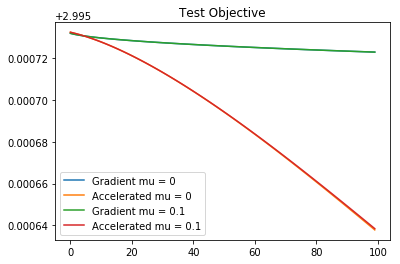

In [28]:
%matplotlib inline
plt.plot(objtest_gd0, label="Gradient mu = 0")
plt.plot(objtest_ad0, label="Accelerated mu = 0")
plt.plot(objtest_gd1, label="Gradient mu = 0.1")
plt.plot(objtest_ad1, label="Accelerated mu = 0.1")

plt.title('Test Objective')
plt.legend()

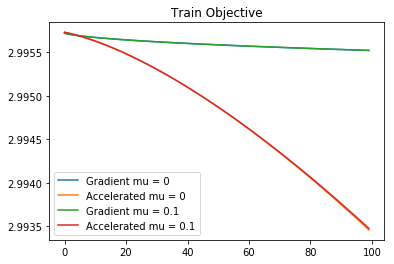

In [29]:
%matplotlib inline
plt.plot(obj_gd0, label="Gradient mu = 0")
plt.plot(obj_ad0, label="Accelerated mu = 0")
plt.plot(obj_gd1, label="Gradient mu = 0.1")
plt.plot(obj_ad1, label="Accelerated mu = 0.1")

plt.title('Train Objective')
plt.legend()

For some reason, the $\mu$ does not effect the loss function. Accelerated descent has a much steeper descent when compared to regular gradient descent. 